# **Processamento de Linguagem Natural **

Análise de sentimentos associado as revisões de filmes encontrados no site IMDB.

**Integrantes**:

| Nome dos Integrantes     | RM            | Turma |
| :----------------------- | :------------- | :-----: |
| Allan Gregory             | RM 330158      | `1IA` |
| Douglas Modesto             | RM 330217      | `1IA` |
| Jonas Prado             | RM 330323      | `1IA` |
| Liliane Scandoleiro             | RM 330672      | `1IA` |

In [1]:
import pandas as pd
import random
import nltk

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\logonrmlocal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\logonrmlocal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Carrega o dataset IMDB que contém críticas de filmes em português e inglês selecionando 10 mil linhas em forma randômica.!

In [2]:
# Dataset que deverá ser carregado
file = 'imdb-reviews-pt-br.csv'

data = pd.read_csv(file)
df = data.sample(n=10000)

#cria um novo index para o dataset
df = df.reset_index() 
df.head()

,index,id,text_en,text_pt,sentiment
0,35414,35416,"This series has its ups and occasional downs, ...","Esta série tem seus altos e baixos ocasionais,...",neg
1,34696,34698,What in Gods name happened here? How does one ...,O que em nome de Deus aconteceu aqui? Como se ...,neg
2,10783,10785,"After having problems in Chicago, the Solomon ...","Depois de ter problemas em Chicago, a família ...",neg
3,34033,34035,The plot of 7EVENTY 5IVE involves college kids...,O enredo de 7EVENTY 5IVE envolve crianças de f...,neg
4,18743,18745,"Well, of course the critics hated it. This isn...","Bem, é claro que os críticos odiaram isso. Est...",pos


In [3]:
#exclui colunas irrelevantes para análise
df = df.drop(columns = ['index', 'id', 'text_en']) 

#Tamanho do dataset (linhas e colunas)
df.shape

(10000, 2)

In [4]:
#Verifica a % de dados nulos no dataset

df.isnull().sum()/df.shape[0]

text_pt      0.0
sentiment    0.0
dtype: float64

In [5]:
#Quantidade de itens classificados negativo

df[df.sentiment == 'neg'].count()

text_pt      5032
sentiment    5032
dtype: int64

In [6]:
#Quantidade de itens classificados positivo

df[df.sentiment == 'pos'].count()

text_pt      4968
sentiment    4968
dtype: int64

## Vetorização

Para trabalhar com o algoritmo de Machine Learning é necessário converter cada termo em uma representação numérica, denominado de vetorização. Depois, calcula a frequência em que essa palavra ocorre em uma sentença, descartando as stopwords.

A função **fit** aprende o vocabulário do dataset e a função **transform** transforma os dados de treinamento codificadas cada uma em vetor com frequêcia das palavras.

In [7]:
stops = nltk.corpus.stopwords.words('portuguese') # remove as stopwords da nossa lista de palavras

vect = CountVectorizer(binary=True, stop_words=stops)
vect.fit(df.text_pt)
text_vect = vect.transform(df.text_pt)

#Separa a base para treino e teste
X_train,X_test,y_train,y_test = train_test_split(
    text_vect, 
    df["sentiment"], 
    train_size = 0.75, 
    random_state = 42
)

#Aplicação do algoritmo de classificação Logistic Regression para análise de sentimentos para cada crítica de filme.

for c in [0.01, 0.05, 0.25, 0.5, 1]: # Compara a melhor acurácia entre os modelos para selecionar o melhor 
    
    lr = LogisticRegression(C=c)
    lr.fit(X_train, y_train)
    print ("Acurácia para C=%s: %s" 
           % (c, accuracy_score(y_test, lr.predict(X_test))))   # verifica a acuracidade dos modelos
    
    
# Treina e testa o modelo que obteve a melhor acuracidade.
final_model = LogisticRegression(C=0.05)
final_model.fit(X_train, y_train)

#Avaliação do modelo através da acurácia, validação cruzada e outras medidas.

# Validação cruzada do modelo. Neste caso, o modelo é dividido em 10 partes, treinado em 9 e testando em 1
resultados = cross_val_predict(final_model, X_test, y_test, cv = 10)
print('cross_val_predict: ', resultados)

print('Acurácia: ', metrics.accuracy_score(y_test, resultados))

sentimentos = ["pos", "neg"]
print(metrics.classification_report(y_test, resultados, sentimentos))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Acurácia para C=0.01: 0.8572
Acurácia para C=0.05: 0.864
Acurácia para C=0.25: 0.858
Acurácia para C=0.5: 0.8528
Acurácia para C=1: 0.8472
cross_val_predict:  ['pos' 'pos' 'neg' ..., 'pos' 'neg' 'neg']
Acurácia:  0.8456
             precision    recall  f1-score   support

        pos       0.83      0.88      0.85      1276
        neg       0.86      0.81      0.84      1224

avg / total       0.85      0.85      0.85      2500



## Normalização

A seguir apresenta-se algumas aplicações de técnicas para "normalização das palavras" como a redução ou a simplificação ou a radicalização de palavras.

### Stemming

O processo de stemming consiste em reduzir a palavra à sua raiz (sem levar em conta a classe gramatical)

**amig : amigo, amiga, amigão**

**gat : gato, gata, gatos, gatas**

Stemming geralmente refere-se a um processo de heurística que corta as extremidades das palavras inclui frequentemente a remoção de afixos derivacionais. Pode ser representado por um conjunto de regras que dependem da linguagem.


In [9]:
def get_stemmed_text(corpus):
    from nltk.stem.porter import PorterStemmer
    stemmer = PorterStemmer()

    return [' '.join([stemmer.stem(word) for word in review.split()]) for review in corpus]

stemmed_reviews_train = get_stemmed_text(df.text_pt)

cv = CountVectorizer(binary=True, stop_words=stops)
cv.fit(stemmed_reviews_train)
X = cv.transform(stemmed_reviews_train)

#Separa a base para treino e teste
X_train,X_test,y_train,y_test = train_test_split(
    X, 
    df["sentiment"], 
    train_size = 0.75, 
    random_state = 42
)

#Aplicação do algoritmo de classificação Logistic Regression para análise de sentimentos para cada crítica de filme.
for c in [0.01, 0.05, 0.25, 0.5, 1]:  # Compara a melhor acurácia entre os modelos para selecionar o melhor
    
    lr = LogisticRegression(C=c)
    lr.fit(X_train, y_train)
    print ("Acurácia para C=%s: %s" 
           % (c, accuracy_score(y_test, lr.predict(X_test)))) # verifica a acuracidade dos modelos
    
# Treina e testa o modelo que obteve a melhor acuracidade.
final_stemmed = LogisticRegression(C=0.05)
final_stemmed.fit(X_train, y_train)

#Avaliação do modelo através da acurácia, validação cruzada e outras medidas.

# Validação cruzada do modelo. Neste caso, o modelo é dividido em 10 partes, treinado em 9 e testando em 1
resultados = cross_val_predict(final_stemmed, X_test, y_test, cv = 10)
print('cross_val_predict: ', resultados)

print('Acurácia: ', metrics.accuracy_score(y_test, resultados))

sentimentos = ["pos", "neg"]
print(metrics.classification_report(y_test, resultados, sentimentos))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Acurácia para C=0.01: 0.8544
Acurácia para C=0.05: 0.8604
Acurácia para C=0.25: 0.852
Acurácia para C=0.5: 0.8492
Acurácia para C=1: 0.8448
cross_val_predict:  ['pos' 'pos' 'neg' ..., 'pos' 'neg' 'neg']
Acurácia:  0.8404
             precision    recall  f1-score   support

        pos       0.83      0.87      0.85      1276
        neg       0.85      0.81      0.83      1224

avg / total       0.84      0.84      0.84      2500



### Lemmatization

Na linguística computacional , a lematização é o processo algorítmico de determinar o lema de uma palavra com base em seu significado pretendido. Diferentemente da stemming , a Lematização depende da identificação correta da parte pretendida da fala e do significado de uma palavra em uma frase, bem como dentro do contexto mais amplo em torno dessa sentença, como sentenças vizinhas ou até mesmo um documento inteiro.


In [10]:
nltk.download('wordnet')


def get_lemmatized_text(corpus):
    
    from nltk.stem import WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    return [' '.join([lemmatizer.lemmatize(word) for word in review.split()]) for review in corpus]

lemmatized_reviews_train = get_lemmatized_text(df.text_pt)

cv = CountVectorizer(binary=True, stop_words=stops)
cv.fit(lemmatized_reviews_train)
X = cv.transform(lemmatized_reviews_train)


#Separa a base para treino e teste
X_train,X_test,y_train,y_test = train_test_split(
    X, 
    df["sentiment"], 
    train_size = 0.75, 
    random_state = 42
)

#Aplicação do algoritmo de classificação Logistic Regression para análise de sentimentos para cada crítica de filme.
for c in [0.01, 0.05, 0.25, 0.5, 1]: # Compara a melhor acurácia entre os modelos para selecionar o melhor
    
    lr = LogisticRegression(C=c)
    lr.fit(X_train, y_train)
    print ("Acurácia para C=%s: %s" 
           % (c, accuracy_score(y_test, lr.predict(X_test)))) # verifica a acuracidade dos modelos

# Treina e testa o modelo que obteve a melhor acuracidade.
final_lemmatized = LogisticRegression(C=0.25)
final_lemmatized.fit(X_train, y_train)

#Avaliação do modelo através da acurácia, validação cruzada e outras medidas.

# Validação cruzada do modelo. Neste caso, o modelo é dividido em 10 partes, treinado em 9 e testando em 1
resultados = cross_val_predict(final_lemmatized, X_test, y_test, cv = 10)
print('Acurácia: ', metrics.accuracy_score(y_test, resultados))

sentimentos = ["pos", "neg"]
print(metrics.classification_report(y_test, resultados, sentimentos))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\logonrmlocal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Acurácia para C=0.01: 0.8588
Acurácia para C=0.05: 0.866
Acurácia para C=0.25: 0.8588
Acurácia para C=0.5: 0.8532
Acurácia para C=1: 0.8512
Acurácia:  0.834
             precision    recall  f1-score   support

        pos       0.82      0.86      0.84      1276
        neg       0.85      0.81      0.83      1224

avg / total       0.83      0.83      0.83      2500



### n-grams

Um n-grama é simplesmente uma sequência de tokens. No contexto da linguística computacional, esses tokens são geralmente palavras, embora possam ser caracteres ou subconjuntos de caracteres. O n simplesmente se refere ao número de tokens. 

In [12]:
ngram_vectorizer = CountVectorizer(binary=True, ngram_range=(1, 2),stop_words=stops)

ngram_vectorizer.fit(df.text_pt)
X = ngram_vectorizer.transform(df.text_pt)

#Separa a base para treino e teste
X_train,X_test,y_train,y_test = train_test_split(
    X, 
    df["sentiment"], 
    train_size = 0.75, 
    random_state = 42
)

#Aplicação do algoritmo de classificação Logistic Regression para análise de sentimentos para cada crítica de filme.
for c in [0.01, 0.05, 0.25, 0.5, 1]: # Compara a melhor acurácia entre os modelos para selecionar o melhor
    
    lr = LogisticRegression(C=c)
    lr.fit(X_train, y_train)
    print ("Acurácia para C=%s: %s" 
           % (c, accuracy_score(y_test, lr.predict(X_test))))  # verifica a acuracidade dos modelos

# Treina e testa o modelo que obteve a melhor acuracidade.
final_ngram = LogisticRegression(C=0.25)
final_ngram.fit(X_train, y_train)

#Avaliação do modelo através da acurácia, validação cruzada e outras medidas.

# Validação cruzada do modelo. Neste caso, o modelo é dividido em 10 partes, treinado em 9 e testando em 1
resultados = cross_val_predict(final_ngram, X_test, y_test, cv = 10)
print('Acurácia: ', metrics.accuracy_score(y_test, resultados))
sentimentos = ["pos", "neg"]
print(metrics.classification_report(y_test, resultados, sentimentos))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Acurácia para C=0.01: 0.8576
Acurácia para C=0.05: 0.8672
Acurácia para C=0.25: 0.868
Acurácia para C=0.5: 0.8672
Acurácia para C=1: 0.8668
Acurácia:  0.8404
             precision    recall  f1-score   support

        pos       0.82      0.88      0.85      1276
        neg       0.86      0.80      0.83      1224

avg / total       0.84      0.84      0.84      2500



### TF-IDF

O valor tf–idf, é uma medida estatística que tem o intuito de indicar a importância de uma palavra de um documento em relação a uma coleção de documentos ou em um corpus linguístico

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words=stops)
tfidf_vectorizer.fit(df.text_pt)
X = tfidf_vectorizer.transform(df.text_pt)

#Separa a base para treino e teste
X_train,X_test,y_train,y_test = train_test_split(
    X, 
    df["sentiment"], 
    train_size = 0.75, 
    random_state = 42
)

#Aplicação do algoritmo de classificação Logistic Regression para análise de sentimentos para cada crítica de filme.
for c in [0.01, 0.05, 0.25, 0.5, 1]: # Compara a melhor acurácia entre os modelos para selecionar o melhor
    
    lr = LogisticRegression(C=c)
    lr.fit(X_train, y_train)
    print ("Acurácia para C=%s: %s" 
           % (c, accuracy_score(y_test, lr.predict(X_test))))  # verifica a acuracidade dos modelos

# Treina e testa o modelo que obteve a melhor acuracidade. 
final_tfidf = LogisticRegression(C=1)
final_tfidf.fit(X_train, y_train)

#Avaliação do modelo através da acurácia, validação cruzada e outras medidas.

# Validação cruzada do modelo. Neste caso, o modelo é dividido em 10 partes, treinado em 9 e testando em 1
resultados = cross_val_predict(final_tfidf, X_test, y_test, cv = 10)
print('Acurácia: ', metrics.accuracy_score(y_test, resultados))
sentimentos = ["pos", "neg"]
print(metrics.classification_report(y_test, resultados, sentimentos))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Acurácia para C=0.01: 0.7344
Acurácia para C=0.05: 0.8248
Acurácia para C=0.25: 0.8548
Acurácia para C=0.5: 0.8652
Acurácia para C=1: 0.8748
Acurácia:  0.8392
             precision    recall  f1-score   support

        pos       0.81      0.90      0.85      1276
        neg       0.88      0.77      0.82      1224

avg / total       0.84      0.84      0.84      2500



## Support Vector Machines (SVM)

SVM é um algoritmo de aprendizado supervisionado associados que analisam os dados usados ​​para classificação e análise de regressão .

In [18]:
from sklearn.svm import LinearSVC

tfidf_vectorizer = TfidfVectorizer(stop_words=stops)
tfidf_vectorizer.fit(df.text_pt)
X = tfidf_vectorizer.transform(df.text_pt)

#Separa a base para treino e teste
X_train,X_test,y_train,y_test = train_test_split(
    X, 
    df["sentiment"], 
    train_size = 0.75, 
    random_state = 42
)

#Aplicação do algoritmo de classificação SVM para análise de sentimentos para cada crítica de filme.
for c in [0.01, 0.05, 0.25, 0.5, 1]: # Compara a melhor acurácia entre os modelos para selecionar o melhor
    
    svm  = LinearSVC(C=c)
    svm.fit(X_train, y_train)
    print ("Acurácia para C=%s: %s" 
       % (c, accuracy_score(y_test, svm.predict(X_test))))  # verifica a acuracidade dos modelos
  

# Treina e testa o modelo que obteve a melhor acuracidade. 
svm = LinearSVC(C=0.25)
svm.fit(X_train, y_train)

# Avaliação do modelo através da acurácia, validação cruzada e outras medidas.

# Validação cruzada do modelo. Neste caso, o modelo é dividido em 10 partes, treinado em 9 e testando em 1
resultados = cross_val_predict(svm, X_test, y_test, cv = 10)
print('Acurácia: ', metrics.accuracy_score(y_test, resultados))
sentimentos = ["pos", "neg"]
print(metrics.classification_report(y_test, resultados, sentimentos))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Acurácia para C=0.01: 0.8308
Acurácia para C=0.05: 0.8644
Acurácia para C=0.25: 0.8768
Acurácia para C=0.5: 0.8724
Acurácia para C=1: 0.8696
Acurácia:  0.8504
             precision    recall  f1-score   support

        pos       0.82      0.90      0.86      1276
        neg       0.88      0.80      0.84      1224

avg / total       0.85      0.85      0.85      2500



## Decision Tree Classifier

Algoritmo Árvore de decisão é um método de aprendizado de máquinas supervisionado não-paramétricos, utilizado para classificação e regressão. Em uma árvore de decisão, uma decisão é tomada através do caminhamento a partir do nó raiz até o nó folha para alcançar a predição que são convertidas em regras para determinar a classificação.

In [19]:
from sklearn import tree

tfidf_vectorizer = TfidfVectorizer(stop_words=stops)
tfidf_vectorizer.fit(df.text_pt)
X = tfidf_vectorizer.transform(df.text_pt)

#Separa a base para treino e teste
X_train,X_test,y_train,y_test = train_test_split(
    X, 
    df["sentiment"], 
    train_size = 0.75, 
    random_state = 42
)

#Aplicação do algoritmo de classificação SVM para análise de sentimentos para cada crítica de filme.

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)


#Avaliação do modelo através da acurácia, validação cruzada e outras medidas.

# Validação cruzada do modelo. Neste caso, o modelo é dividido em 10 partes, treinado em 9 e testando em 1
resultados = cross_val_predict(clf, X_test, y_test, cv = 10)
print('Acurácia: ', metrics.accuracy_score(y_test, resultados))
sentimentos = ["pos", "neg"]
print(metrics.classification_report(y_test, resultados, sentimentos))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Acurácia:  0.6756
             precision    recall  f1-score   support

        pos       0.68      0.68      0.68      1276
        neg       0.67      0.67      0.67      1224

avg / total       0.68      0.68      0.68      2500



## Modelo Final

Aplicamos as técnicas de normalização stemming, lemmatization,n-grams e TF-IDF, todas removendo as stopwords da língua portuguesa. Selecionamos a que obteve melhor F1 score na maioria dos testes realizados a partir do algoritmo de classificação de Regressão Logística.

Após selecionar a técnica de normalização aplicamos três algoritmos de classificação que são a Regressão Logística, SVM e Decision Tree para comparar a acurácia, precision, recall e f1-score de cada modelo. Para selecionar o melhor algoritmo para o modelo final, optamos pelo algoritmo SVM que se prevaleceu superior comparado com os outros dois algoritmos ao obter F1 score em torno de 0.84 na maioria dos testes.

In [20]:
from sklearn.svm import LinearSVC

tfidf_vectorizer = TfidfVectorizer(stop_words=stops)
tfidf_vectorizer.fit(df.text_pt)
X = tfidf_vectorizer.transform(df.text_pt)

#Separa a base para treino e teste
X_train,X_test,y_train,y_test = train_test_split(
    X, 
    df["sentiment"], 
    train_size = 0.75, 
    random_state = 42
)

#Aplicação do algoritmo de classificação SVM para análise de sentimentos para cada crítica de filme.
for c in [0.01, 0.05, 0.25, 0.5, 1]: # Compara a melhor acurácia entre os modelos para selecionar o melhor
    
    svm  = LinearSVC(C=c)
    svm.fit(X_train, y_train)
    print ("Acurácia para C=%s: %s" 
           % (c, accuracy_score(y_test, lr.predict(X_test))))  # verifica a acuracidade dos modelos

# Treina e testa o modelo que obteve a melhor acuracidade. 
final_svm = LinearSVC(C=0.25)
final_svm.fit(X_train, y_train)

#Avaliação do modelo através da acurácia, validação cruzada e outras medidas.

# Validação cruzada do modelo. Neste caso, o modelo é dividido em 10 partes, treinado em 9 e testando em 1
resultados = cross_val_predict(final_tfidf, X_test, y_test, cv = 10)
print('Acurácia: ', metrics.accuracy_score(y_test, resultados))
sentimentos = ["pos", "neg"]
print(metrics.classification_report(y_test, resultados, sentimentos))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Acurácia para C=0.01: 0.8748
Acurácia para C=0.05: 0.8748
Acurácia para C=0.25: 0.8748
Acurácia para C=0.5: 0.8748
Acurácia para C=1: 0.8748
Acurácia:  0.8392
             precision    recall  f1-score   support

        pos       0.81      0.90      0.85      1276
        neg       0.88      0.77      0.82      1224

avg / total       0.84      0.84      0.84      2500



## TOP 10 palavras positivas e negativas

TOP 10 palavras positivas e negativas referente a base de dados de críticas de filmes no portal IMDB.

In [30]:
feature_to_coef = {
    word: coef for word, coef in zip(
        tfidf_vectorizer.get_feature_names(), final_svm.coef_[0]
    )
}

lista_boa = []
lista_ruim = []


for best_positive in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1], 
    reverse=True)[:10]:
    print (best_positive)
    lista_boa.append(str(best_positive[0]))
    
print("\n\n")
for best_negative in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1])[:10]:
    print (best_negative)
    lista_ruim.append(str(best_negative[0]))
    

('excelente', 2.741381995663172)
('ótimo', 2.3056699540377177)
('gostei', 1.8606195711410798)
('incrível', 1.800707108371753)
('brilhante', 1.6549019241075882)
('fácil', 1.6296147305629236)
('hoje', 1.5740059855113739)
('especialmente', 1.5524209188038058)
('ótima', 1.527162320916081)
('melhores', 1.3887123702810915)



('pior', -3.2744285926961774)
('ruim', -3.0486694758444255)
('horrível', -2.6371199203342623)
('terrível', -2.5736226693940645)
('infelizmente', -2.5003663455632172)
('nada', -2.3969834983363643)
('chato', -1.9100633017798749)
('mal', -1.9077155760344524)
('minutos', -1.7613753197430215)
('piores', -1.718806489889021)


In [31]:
#Criação de dataframes para as TOP 10 palavras positivas e negativas 

df_boa = pd.DataFrame(lista_boa)
df_ruim = pd.DataFrame(lista_ruim)

In [32]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        max_font_size=60,
        scale=5,
        random_state=1 
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

### Nuvem de palavras Positivas

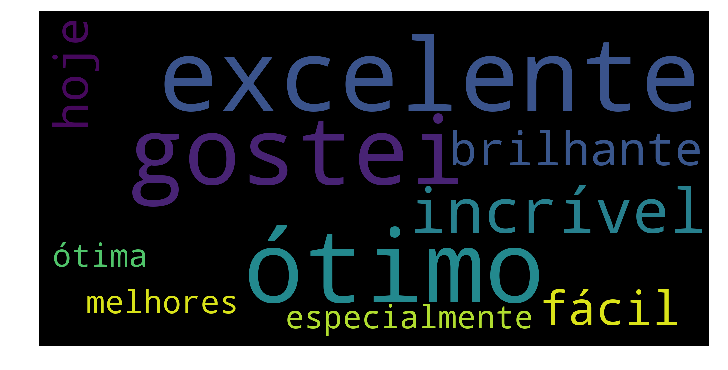

In [33]:
show_wordcloud(df_boa)

### Nuvem de palavras Negativas

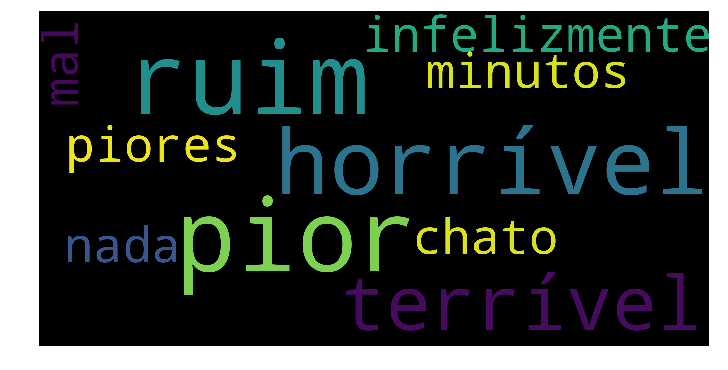

In [34]:
show_wordcloud(df_ruim)